In [1]:
from keras import layers
from keras import models
from keras import optimizers
import tensorflow as tf
import numpy as np
import pandas as pd
import xlrd
from keras.callbacks import ModelCheckpoint
import os
from jqdatasdk import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
excel = pd.read_excel('D:\桌面\pigpig\机械设备.xlsx', engine='openpyxl')
raw = np.array(excel)
y_data = []
x_data = []
for arr in raw:
    x_data.append(arr[5:75])
    y_data.append(arr[75:])

len(x_data[0])

70

In [3]:
def NAN_Replace(data):
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if data[i, j] == '--':
                data[i, j] = 0
    
    return data

In [4]:
x_data = NAN_Replace(np.array(x_data))
y_data = NAN_Replace(np.array(y_data))

x_data.shape

(432, 70)

In [5]:
x_data = x_data.astype('float64')
y_data = y_data.astype('float64')

x_train = x_data[:350]
y_train = y_data[:350]

x_val = x_data[350:400]
y_val = y_data[350:400]

x_test = x_data[400:]
y_test = y_data[400:]


x_train = x_train.reshape((350, 70, 1))/1e6
y_train = y_train.reshape((350, 10, 1))/1e6
x_val = x_val.reshape((50, 70, 1))/1e6 
y_val = y_val.reshape((50, 10, 1))/1e6 
x_test = x_test.reshape((32, 70, 1))/1e6
y_test = y_test.reshape((32, 10, 1))/1e6
type(x_train)

numpy.ndarray

In [7]:
# LSTM 神经网络搭建
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128, input_shape=(70, 1), return_sequences=True))
model.add(tf.keras.layers.LSTM(64, dropout=0.1, return_sequences=False))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.01), loss='mse')
model.fit(x_train, y_train, epochs=20, batch_size= 128, validation_data=(x_val,y_val))   

Epoch 1/20
3/3 [==============================] - 3s 435ms/step - loss: 7084507.5000 - val_loss: 54269968.0000
Epoch 2/20
3/3 [==============================] - 0s 136ms/step - loss: 7074146.5000 - val_loss: 54199796.0000
Epoch 3/20
3/3 [==============================] - 0s 130ms/step - loss: 7044897.5000 - val_loss: 54048316.0000
Epoch 4/20
3/3 [==============================] - 0s 139ms/step - loss: 6982173.5000 - val_loss: 53786720.0000
Epoch 5/20
3/3 [==============================] - 0s 131ms/step - loss: 6893040.5000 - val_loss: 53349892.0000
Epoch 6/20
3/3 [==============================] - 0s 135ms/step - loss: 6764723.0000 - val_loss: 52714264.0000
Epoch 7/20
3/3 [==============================] - 0s 130ms/step - loss: 6567016.5000 - val_loss: 51875088.0000
Epoch 8/20
3/3 [==============================] - 0s 131ms/step - loss: 6323770.0000 - val_loss: 50771084.0000
Epoch 9/20
3/3 [==============================] - 0s 131ms/step - loss: 6082291.5000 - val_loss: 49411260.0000
E

In [8]:
model.evaluate(x_test, y_test)

1/1 [==============================] - 1s 539ms/step - loss: 1994743.0000


1994743.0

In [9]:
x_predict = x_data[402] #402
y = y_data[402]

x_predict = x_predict.reshape((1, 70, 1))/1e6
y_predict = model.predict(x_predict)*1e6


print(y)
print(y_predict)

[5.52524443e+07 2.26051538e+08 1.51491987e+08 8.64828331e+07
 2.44304680e+07 1.69115141e+08 1.33363847e+08 9.07518810e+07
 4.33444459e+07 2.16057250e+08]
[[3.8225796e+07 1.9978274e+08 1.3246110e+08 9.0793496e+07 5.4596536e+07
  1.9734798e+08 1.3123053e+08 9.9799912e+07 3.4035148e+07 1.7329893e+08]]


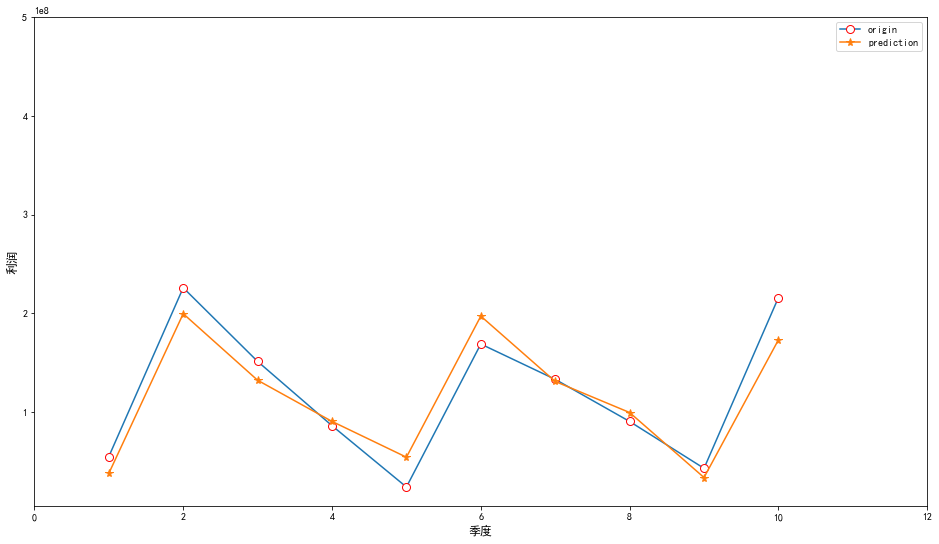

In [10]:
import matplotlib.pyplot as plt
from pylab import *                                 #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']

x = [i for i in range(1, 11)]
plt.figure(figsize = (16, 9))
plt.axis([0, 12, 5e6, 5e8]) 
# plt.ylim([5e6, 5e8])
plt.plot(x, y, marker='o', ms=8, mec ='r', mfc = 'w', label = 'origin')
plt.plot(x, y_predict[0], marker='*', ms = 8, label = 'prediction')
plt.ylabel(f"利润", fontsize=12)
plt.xlabel(f"季度", fontsize=12)
plt.legend()
plt.show()

In [11]:
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model\assets


INFO:tensorflow:Assets written to: saved_model/my_model\assets


In [14]:
new_model = tf.keras.models.load_model('saved_model/my_model')

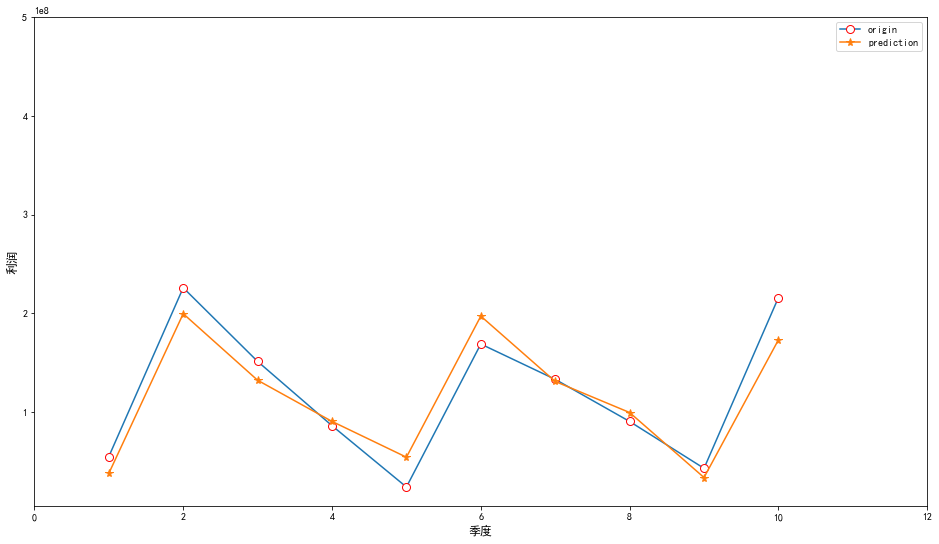

In [15]:
x_predict = x_data[402] #402
y = y_data[402]

x_predict = x_predict.reshape((1, 70, 1))/1e6
y_predict = new_model.predict(x_predict)*1e6

x = [i for i in range(1, 11)];
plt.figure(figsize = (16, 9))
plt.axis([0, 12, 5e6, 5e8]) 
# plt.ylim([5e6, 5e8])
plt.plot(x, y, marker='o', ms=8, mec ='r', mfc = 'w', label = 'origin')
plt.plot(x, y_predict[0], marker='*', ms = 8, label = 'prediction')
plt.ylabel(f"利润", fontsize=12)
plt.xlabel(f"季度", fontsize=12)
plt.legend()
plt.show()